# COURSE: Neural signal processing and analysis: Zero to hero
## SESSION: Problem set: Simulating and visualizing data
### TEACHER: Mike X Cohen, sincxpress.com

---

## Instructions:
The goal of this assignment is to simulate time series data that can be used to test time-series analysis methods. For each section below:
1. Complete the MATLAB code
2. Put the data into the EEG structure - Make sure all relevant fields are accurate (EEG.data, EEG.pnts, EEG.trials, EEG.srate, EEG.nbchan, EEG.times)
3. Plot the data using the function `plot_simEEG()`

**NOTE 1:** Obviously, you need to fill in missing code.
**NOTE 2:** Be careful, because sometimes there is incorrect code that doesn't produce coding errors. Remember: Visualize, and visualize often.

---

### 1) white noise

The goal of this exercise is to gain basic familiarity with data simulations. You will create a dataset of white noise and plot it.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from attributedict.collections import AttributeDict
from scipy.fft import fft, ifft

In [ ]:
def plot_simEEG(*args):
    """
    plot_simEEG - plot function for MXC's course on neural time series analysis
    INPUTS:  EEG : eeglab structure
             chan : channel to plot (default = 0)
           fignum : figure to plot into (default = 0)
    """
    if not args:
        raise ValueError('No inputs!')
    elif len(args) == 1:
        EEG = args[0]
        chan, fignum = 0, 0
    elif len(args) == 2:
        EEG, chan = args
        fignum = 0
    elif len(args) == 3:
        EEG, chan, fignum = args

    plt.figure(fignum, figsize=(16,10))
    plt.clf()

    # ERP
    plt.subplot(211)
    plt.plot(EEG.times, np.squeeze(EEG.data[chan,:,:]), linewidth=0.5, color=[.75, .75, .75])
    plt.plot(EEG.times, np.squeeze(np.mean(EEG.data[chan,:,:], axis=1)), 'k', linewidth=3)
    plt.xlabel('Time (s)')
    plt.ylabel('Activity')
    plt.title(f'ERP from channel {chan}')

    # static power spectrum
    hz = np.linspace(0, EEG.srate, EEG.pnts)
    if len(EEG.data.shape) == 3:
        pw = np.mean((2 * np.abs(fft(np.squeeze(EEG.data[chan,:,:])) / EEG.pnts))**2, axis=1)
    else:
        pw = (2 * np.abs(fft(EEG.data[chan,:]) / EEG.pnts))**2

    plt.subplot(223)
    plt.plot(hz, pw, linewidth=2)
    plt.xlim([0, 40])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Static power spectrum')

    # time-frequency analysis
    frex = np.linspace(2, 30, 40)  # frequencies in Hz (hard-coded to 2 to 30 in 40 steps)
    waves = 2 * (np.linspace(3, 10, len(frex)) / (2 * np.pi * frex))**2  # number of wavelet cycles (hard-coded to 3 to 10)

    # setup wavelet and convolution parameters
    wavet = np.arange(-2, 2, 1/EEG.srate)
    halfw = len(wavet) // 2
    nConv = EEG.pnts * EEG.trials + len(wavet) - 1

    # initialize time-frequency matrix
    tf = np.zeros((len(frex), EEG.pnts))

    # spectrum of data
    dataX = fft(np.reshape(EEG.data[chan,:,:], -1), nConv)

        # loop over frequencies
    for fi in range(len(frex)):
        # create wavelet
        waveX = fft(np.exp(2 * 1j * np.pi * frex[fi] * wavet) * np.exp(-wavet**2 / waves[fi]), nConv)
        waveX = waveX / np.max(waveX) # normalize

        # convolve
        as_ = ifft(waveX * dataX)
        # trim and reshape
        as_ = np.reshape(as_[halfw:-halfw+1], [EEG.pnts, EEG.trials])

        # power
        tf[fi, :] = np.mean(np.abs(as_), axis=1)

    # show a map of the time-frequency power
    plt.subplot(224)
    plt.contourf(EEG.times, frex, tf, 40)
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.title('Time-frequency plot')

    plt.show()


In [92]:
EEG = AttributeDict()

In [132]:
# specify EEG parameters
EEG.srate  = 500 # sampling rate in Hz
EEG.pnts   = 200
EEG.trials = 10
EEG.nbchan = 12

# time vector
EEG.times = np.arange(0, EEG.pnts)/EEG.srate;


# create data as white noise
# EEG.data = np.random.randn(EEG.nbchan, EEG.pnts, EEG.trials) # from normal distribution
EEG.data = np.random.uniform(size=(EEG.nbchan, EEG.pnts, EEG.trials)) # from uniform distribution

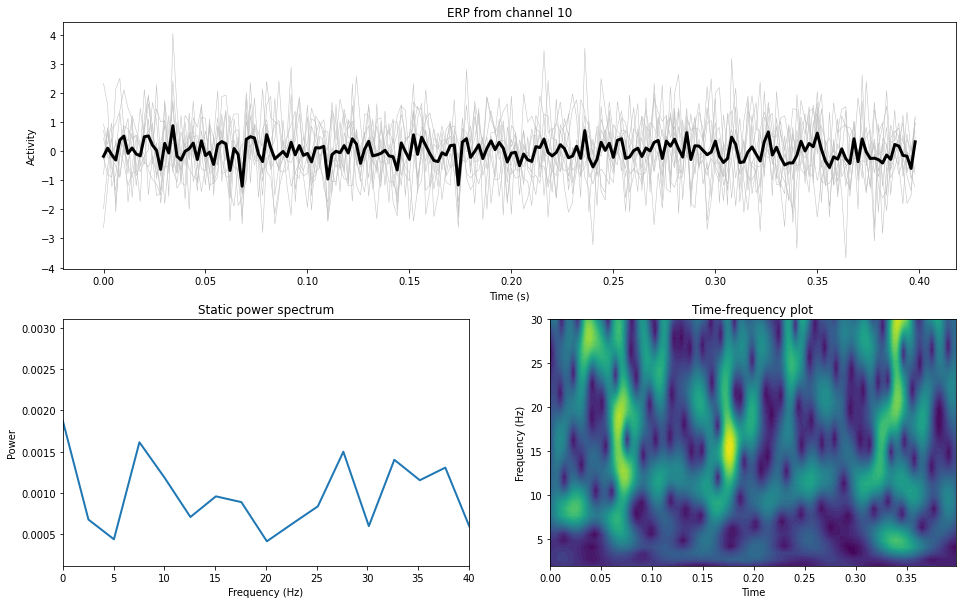

In [131]:
plot_simEEG(EEG,10,3)

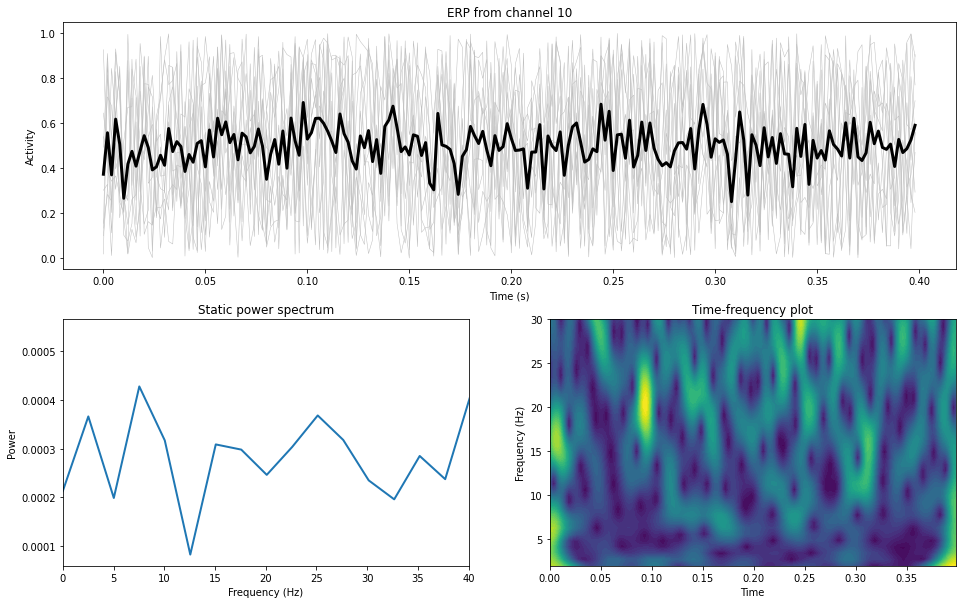

In [133]:
plot_simEEG(EEG,10,3)

#### Question: What is the effect of noise amplitude on the resulting graphs?
#### Question: Do the results change if you use normally distributed vs. uniformly distributed noise?
#### Question: Are the results different for different channels? Why or why not?

# 2) Pink Noise

The goal of this exercise is to extend the previous exercise to "pink" noise.
You should create the noise separately on each trial


In [134]:
# feel free to change some parameters compared to above...
EEG.nbchan = 4;

# the key parameter of pink noise is the exponential decay (ed)
ed = 50; # try different values!

# initialize EEG data as a zeros matrix
EEG.data = np.zeros((EEG.nbchan, EEG.pnts, EEG.trials));